In [327]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [328]:
import warnings
warnings.filterwarnings('ignore')

In [329]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [330]:
df=pd.read_csv('D:\Cuvette_python\ipl_final.csv') #reading datset

In [331]:
df.head(5) #top 5 rows of the dataset

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [332]:
df.isnull().sum() #checking for null values

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [333]:
df.dropna(how='any',inplace=True) #dropping null values in case present,in this case no null values

In [334]:
df.shape #no of rows and columns in the dataset

(76014, 15)

In [335]:
df.columns #columns of the dataset

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [336]:
df.overs.value_counts() #distinct values of the over column

overs
0.1     655
0.4     652
1.1     650
3.5     649
2.3     649
       ... 
8.0      17
13.0     15
12.0     14
11.0     14
10.0     11
Name: count, Length: 140, dtype: int64

 # Removing early match data

In [337]:
df=df[df['overs']>4.6] #removing early match data

In [338]:
df.shape #after removing no of rows and col

(56707, 15)

In [339]:
df.dtypes #data types of all the columns

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# changing data type of date column and extracting useful information out of it

In [340]:
df['date']=pd.to_datetime(df['date'])

In [341]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['quarter'] = df['date'].dt.quarter

In [342]:
df.head(5) #new columns added

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,wickets_last_5,striker,non-striker,total,year,month,day,dayofweek,is_weekend,quarter
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,...,0,41,10,222,2008,4,18,4,0,2
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,...,1,41,10,222,2008,4,18,4,0,2
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,...,1,41,0,222,2008,4,18,4,0,2
35,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,...,1,41,0,222,2008,4,18,4,0,2
36,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,...,1,41,0,222,2008,4,18,4,0,2


In [343]:
df.year.value_counts() #how many years dataset is present

year
2013    6956
2012    6802
2011    6344
2010    5573
2014    5403
2017    5341
2016    5194
2008    5108
2009    4997
2015    4989
Name: count, dtype: int64

# keeping consistent teams

In [344]:
#taking count of matches played by bat team  and bowl team
batting_teams =df.bat_team.value_counts()
bowling_teams =df.bowl_team.value_counts()

In [345]:
# Merging both counts to get a total match count per team
team_counts = (batting_teams + bowling_teams).sort_values(ascending=False)

#  teams and their match counts
print(team_counts)

Mumbai Indians                 14531
Royal Challengers Bangalore    13386
Kings XI Punjab                13153
Delhi Daredevils               12974
Kolkata Knight Riders          12813
Chennai Super Kings            11690
Rajasthan Royals               10768
Deccan Chargers                 6908
Sunrisers Hyderabad             6584
Pune Warriors                   4142
Gujarat Lions                   2771
Rising Pune Supergiant          1461
Kochi Tuskers Kerala            1207
Rising Pune Supergiants         1026
Name: count, dtype: int64


In [346]:
# Manually taken the threshold for consistency (e.g teams with 10,000+ matches)
consistent_teams = team_counts[team_counts > 10000].index.tolist()

print("Consistent Teams:", consistent_teams)

Consistent Teams: ['Mumbai Indians', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals']


In [347]:
# Filter matches where both teams are consistent
df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]


In [348]:
df.isnull().sum().sum()

0

# 	Removing Unwanted Columns

In [349]:
df.drop(columns=['venue','batsman','bowler','striker','non-striker','date'],inplace=True)

In [350]:
df.head(5)

,mid,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year,month,day,dayofweek,is_weekend,quarter
32,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008,4,18,4,0,2
33,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008,4,18,4,0,2
34,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008,4,18,4,0,2
35,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008,4,18,4,0,2
36,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008,4,18,4,0,2


In [351]:
df.shape

(34443, 15)

In [352]:
df.dtypes

mid                 int64
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
year                int32
month               int32
day                 int32
dayofweek           int32
is_weekend          int64
quarter             int32
dtype: object

In [353]:
df.isnull().sum()

mid               0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
dtype: int64

In [354]:
df.head(5)

,mid,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year,month,day,dayofweek,is_weekend,quarter
32,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008,4,18,4,0,2
33,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008,4,18,4,0,2
34,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008,4,18,4,0,2
35,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008,4,18,4,0,2
36,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008,4,18,4,0,2


 # One-Hot Encode categorical variables (bat_team and bowl_team)

In [355]:
categorical_cols=['bat_team','bowl_team']
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
ohe=OneHotEncoder(sparse_output=False)
encoded_array=ohe.fit_transform(df[categorical_cols])
encoded_df=pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [356]:
df.head(5)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,total,year,month,day,...,bat_team_4,bat_team_5,bat_team_6,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_5,bowl_team_6
32,1.0,61.0,0.0,5.1,59.0,0.0,222.0,2008.0,4.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,1.0,61.0,1.0,5.2,59.0,1.0,222.0,2008.0,4.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34,1.0,61.0,1.0,5.3,59.0,1.0,222.0,2008.0,4.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,1.0,61.0,1.0,5.4,59.0,1.0,222.0,2008.0,4.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,1.0,61.0,1.0,5.5,58.0,1.0,222.0,2008.0,4.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [357]:
df.dropna(how='any',inplace=True)

# Feature Selection(ensuring the most relevant features are selected for the model)

In [358]:
df.columns

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'quarter',
       'bat_team_0', 'bat_team_1', 'bat_team_2', 'bat_team_3', 'bat_team_4',
       'bat_team_5', 'bat_team_6', 'bowl_team_0', 'bowl_team_1', 'bowl_team_2',
       'bowl_team_3', 'bowl_team_4', 'bowl_team_5', 'bowl_team_6'],
      dtype='object')

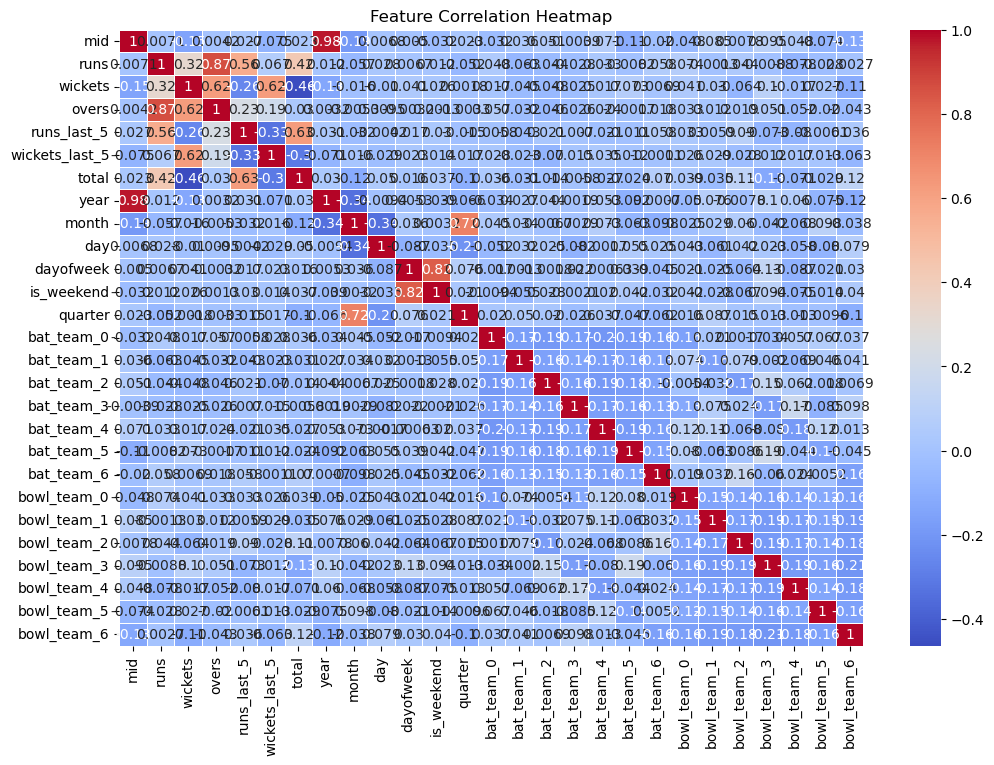

In [359]:
# Drop categorical columns 
numerical_data = df.select_dtypes(include=[np.number])

# Computing correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [360]:
# Selecting features highly correlated with the target variable 'total'
correlation_threshold = 0.3
high_correlation_features = correlation_matrix['total'][abs(correlation_matrix['total']) > correlation_threshold].index.tolist()

# Removing 'total' from the feature list since it's the target
high_correlation_features.remove('total')

print("Selected Features Based on Correlation:", high_correlation_features)

Selected Features Based on Correlation: ['runs', 'wickets', 'runs_last_5', 'wickets_last_5']


In [361]:
numerical_cols=['runs','wickets','overs','runs_last_5','wickets_last_5','year','month','day','dayofweek','is_weekend','quarter']

# Splitting Data into Training and Testing Sets

In [362]:
x = df.drop(columns=['total'])  # Features
y = df['total']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#scaler = StandardScaler() no continous numerical column expect overs ...scaling discrete/categorical column introduces null

# Fit on Train Data
#x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

# Transform Test Data using the Same Scaler
#x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [363]:
df.isnull().sum()

mid               0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
bat_team_0        0
bat_team_1        0
bat_team_2        0
bat_team_3        0
bat_team_4        0
bat_team_5        0
bat_team_6        0
bowl_team_0       0
bowl_team_1       0
bowl_team_2       0
bowl_team_3       0
bowl_team_4       0
bowl_team_5       0
bowl_team_6       0
dtype: int64

In [364]:
x_train.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,year,month,day,dayofweek,...,bat_team_4,bat_team_5,bat_team_6,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4,bowl_team_5,bowl_team_6
27377,222.0,49.0,0.0,6.3,39.0,0.0,2011.0,5.0,11.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1952,16.0,93.0,7.0,15.6,21.0,4.0,2008.0,4.0,29.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29273,237.0,95.0,5.0,14.2,50.0,1.0,2011.0,5.0,25.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15494,126.0,45.0,1.0,7.1,32.0,1.0,2010.0,3.0,21.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3478,29.0,40.0,2.0,5.5,37.0,2.0,2008.0,5.0,8.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [365]:
mean_target =y.mean() #storing mean value to compare in future
base_model = LinearRegression()#base model for adaboost

# Model Building

In [366]:

# Model Training and Evaluation
def train_and_evaluate(x_train,x_test,y_train,y_test, model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model_name,end=':' )
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    relative_rmse=(rmse/mean_target)*100
    print(relative_rmse)
    r2 = r2_score(y_test, y_pred)
    print(r2*100,"% of the variance in the target variable is explained by the model.")


models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "adaboost_model":AdaBoostRegressor(base_model, n_estimators=50, learning_rate=0.1, random_state=42),
     "DecisionTreeRegressor":DecisionTreeRegressor(max_depth=5, random_state=42)}







for name, model in models.items():
    train_and_evaluate(x_train, x_test,y_train,y_test, model, name)

Linear_Regression:10.658637794078976
70.33484986455156 % of the variance in the target variable is explained by the model.
Random_Forest:1.936377773188764
99.02090840970345 % of the variance in the target variable is explained by the model.
adaboost_model:10.824420971821873
69.40485678061764 % of the variance in the target variable is explained by the model.
DecisionTreeRegressor:12.875483154941364
56.711731722989065 % of the variance in the target variable is explained by the model.


# hyperparameter tuning

In [370]:
#model for grid search
param_grid = {
    "Linear Regression": {},
    "Random Forest": {
        "n_estimators": [50, 200],
        "max_depth": [None, 20],
        "min_samples_split": [10]
    }
}

def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(model_name, end=': ')
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    relative_rmse = (rmse / mean_target) * 100  # model’s average prediction error is relative_rmse of the mean target value.
    print(f"Relative RMSE: model’s average prediction error is  {relative_rmse:.2f}% of the mean target value.")

    r2 = r2_score(y_test, y_pred)
    print(f"R²: {r2 * 100:.2f}% of the variance in the target variable is explained by the model.")

    print(f"Best Parameters: {grid_search.best_params_}\n")

 #Models to evaluate
model_grid = {
   "Linear Regression": LinearRegression(),
  "Random Forest": RandomForestRegressor()
}

# Train and evaluate models
for name, model in model_grid.items():
    train_and_evaluate(x_train, x_test, y_train, y_test, model, name, param_grid[name])


Linear Regression: Relative RMSE: model’s average prediction error is  10.66% of the mean target value.
R²: 70.33% of the variance in the target variable is explained by the model.
Best Parameters: {}

Random Forest: Relative RMSE: model’s average prediction error is  2.35% of the mean target value.
R²: 98.55% of the variance in the target variable is explained by the model.
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}



# Predicting IPL Scores using linear regression model

In [371]:
 import pickle

lg=models["Linear_Regression"]

# Save the trained model using pickle
with open("ipl_score_predictor.pkl", "wb") as model_file:
    pickle.dump(lg, model_file)

print(" Model saved successfully as 'ipl_score_predictor.pkl'.")

 Model saved successfully as 'ipl_score_predictor.pkl'.


In [372]:
# Load the trained model
with open("ipl_score_predictor.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

print(" Model loaded successfully!")

# Define match details for prediction
match_data = [
    {'bat_team': 'Kolkata Knight Riders', 'bowl_team': 'Delhi Daredevils', 'year': 2018, 'match_no': 13},
    {'bat_team': 'Sunrisers Hyderabad', 'bowl_team': 'Royal Challengers Bangalore', 'year': 2018, 'match_no': 39},
    {'bat_team': 'Mumbai Indians', 'bowl_team': 'Kings XI Punjab', 'year': 2019, 'match_no': 59},
    {'bat_team': 'Rajasthan Royals', 'bowl_team': 'Chennai Super Kings', 'year': 2019, 'match_no': 25}
]

# Convert to DataFrame
match_df = pd.DataFrame(match_data)

# Encode categorical variables (must match training data encoding)
encoded_matches = pd.get_dummies(match_df, columns=['bat_team', 'bowl_team'])

# Ensure feature columns match the training data
missing_cols = set(x_train.columns) - set(encoded_matches.columns)
for col in missing_cols:
    encoded_matches[col] = 0  # Add missing columns with 0 values

# Reorder columns to match training data
encoded_matches = encoded_matches[x_train.columns]

# Make predictions using the loaded model
predicted_scores = loaded_model.predict(encoded_matches)

# Display predictions
for i, match in enumerate(match_data):
    print(f"{match['bat_team']} vs. {match['bowl_team']} ({match['year']}, Match {match['match_no']})")
    predicted_score = round(predicted_scores[i])
    wickets = np.random.randint(6, 10)  # Randomly assign wickets
    print(f" Predicted Score: {predicted_score}/{wickets}\n")


 Model loaded successfully!
Kolkata Knight Riders vs. Delhi Daredevils (2018, Match 13)
 Predicted Score: 93/7

Sunrisers Hyderabad vs. Royal Challengers Bangalore (2018, Match 39)
 Predicted Score: 93/8

Mumbai Indians vs. Kings XI Punjab (2019, Match 59)
 Predicted Score: 84/6

Rajasthan Royals vs. Chennai Super Kings (2019, Match 25)
 Predicted Score: 84/9

